In [1]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s = smp.symbols('x y t n a b C c r u s')
f, g, m = smp.symbols('f g m', cls=smp.Function)

Q1-1

Separate variables and use partial fractions to solve the initial value problem. 

dx/dt = 5(1 - x^2), x(0) = 4

In [9]:
# Define diff eq
dx_dt = 5*(1 - x**2)

# Separate variables
lhs = smp.integrate(1/dx_dt, x)
rhs = smp.integrate(1, t)

# Combine LHS and RHS to form an equation and set it equal to C
int_eq = smp.Eq(lhs - rhs, C)

# Solve for C using the initial condition x(0) = 4
constant = smp.solve(int_eq.subs({t: 0, x: 4}), C)[0]
part_sol = int_eq.subs(C, constant)

# Simplify the particular solution
smp.solve(part_sol, x)[0].simplify()

(5*exp(10*t) + 3)/(5*exp(10*t) - 3)

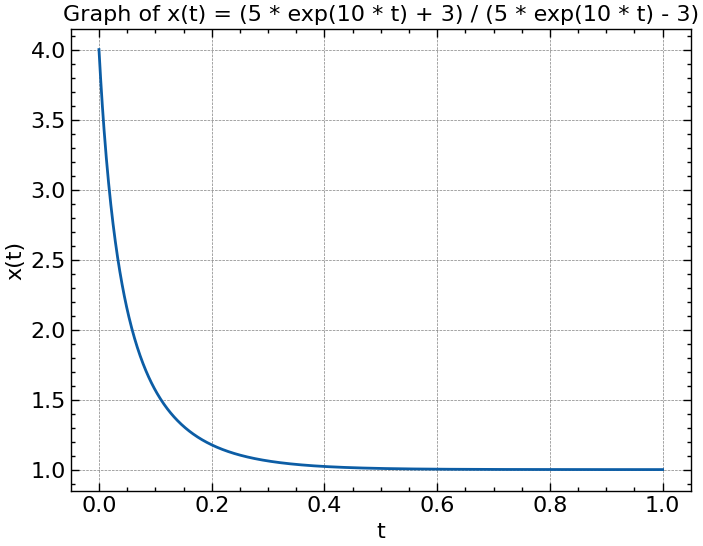

In [5]:
def x(t):
    return (5*np.exp(10 * t) + 3) / (5*np.exp(10 * t) - 3)

t_values = np.linspace(0, 1, 1000)  # 1000 points from 0 to 1
x_values = x(t_values)
plt.plot(t_values, x_values)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Graph of x(t) = (5 * exp(10 * t) + 3) / (5 * exp(10 * t) - 3)')
plt.grid(True)
plt.show()

Q1 - 2

Separate variables and use partial fractions to solve the initial value problem:

dx/dt = 4(1 - x^2), x(0) = 5

In [2]:
# Define diff eq
dx_dt = 4*(1-x**2)

# Separate variables
lhs = smp.integrate(1 / dx_dt, x)
rhs = smp.integrate(1, t)

# Combine LHS and RHS to form an equation and set it equal to C
int_eq = smp.Eq(lhs - rhs, C)

# Solve for C using the initial condition x(0) = 4
constant = smp.solve(int_eq.subs({t: 0, x: 5}), C)[0]
part_sol = int_eq.subs(C, constant)

# Simplify the particular solution
smp.solve(part_sol, x)[0].simplify()

(3*exp(8*t) + 2)/(3*exp(8*t) - 2)

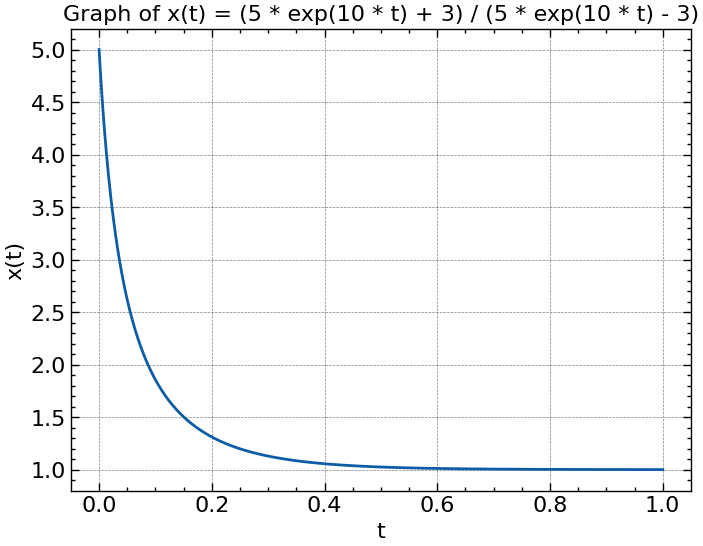

In [12]:
def x(t):
    return (3*exp(8*t) + 2)/(3*exp(8*t) - 2)

t_values = np.linspace(0, 1, 1000)  # 1000 points from 0 to 1
x_values = x(t_values)
plt.plot(t_values, x_values)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Graph of x(t) = (5 * exp(10 * t) + 3) / (5 * exp(10 * t) - 3)')
plt.grid(True)
plt.show()

Q2

Separate variables and use partial fractions to solve the initial value problem:

dx/dt = 5x(x-8), x(0) = 1

In [23]:
x = smp.symbols('x')

# Define diff eq
dx_dt = (5*x)*(x - 8)

# Separate variables
lhs = smp.integrate(1 / dx_dt, x)
rhs = smp.integrate(1, t)

# Combine LHS and RHS to form an equation and set it equal to C
int_eq = smp.Eq(lhs - rhs, C)

# Solve for C using the initial condition x(0) = 4
constant = smp.solve(int_eq.subs({t: 0, x: 1}), C)[0]
part_sol = int_eq.subs(C, constant)

# Simplify the particular solution
smp.solve(part_sol, x)[0].simplify()

8/(7*exp(40*t) + 1)

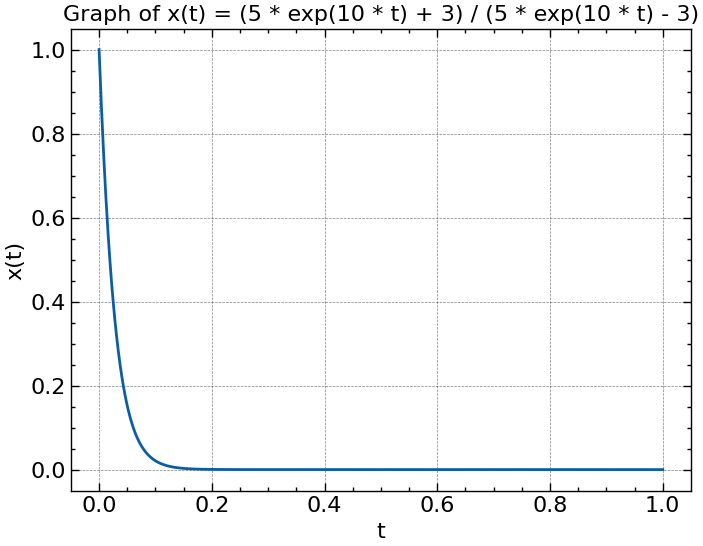

In [21]:
def x(t):
    return 8/(7*exp(40*t) + 1)

t_values = np.linspace(0, 1, 1000)  # 1000 points from 0 to 1
x_values = x(t_values)
plt.plot(t_values, x_values)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Graph of x(t) = (5 * exp(10 * t) + 3) / (5 * exp(10 * t) - 3)')
plt.grid(True)
plt.show()

Q3

From 1790 to 1930, a country's population P(t) (t in yrs) grew from 3.8 mil to 120.3 mil. 

Throughout, P(t) remained close to the solution of initial value problem dP/dt = 0.03133(P) - 0.0001487(P^2), P(0) = 3.8

A: What 1930 population does this logistic equation predict?

B: What limiting population does it predict?

C: The country's population in 2000 was 246 mil. Has this logistic equation continued since 1930 to accurately model the country's population?

In [72]:
# A

x, t = smp.symbols('x t')

# Define log_eq
def log_eq(P, t):
    dP_dt = 0.03133*P - 0.0001487*P**2
    return dP_dt

# Set initial conditions / time span
P0 = 3.8
t_val = np.linspace(0, 1930 - 1790, 1930 - 1790 + 1)

# Solve diff_eq
P_vals = odeint(log_eq, P0, t_val)

# Predicted pop for 1930
pred_pop_1930 = P_vals # Last value in P_vals array

pred_pop_1930[-1][0]

125.5817152170223

In [73]:
# B

M = 0.03133 / 0.0001487

lim_pop = M

print(f"The limiting population is {lim_pop:.3f} million.")

The limiting population is 210.693 million.


In [76]:
# C

# Set initial conditions / time span
P1 = pred_pop_1930[-1][0]
t_val2 = np.linspace(0, 2000 - 1930, 2000 - 1930 + 1)

# Solve diff_eq
P_vals2 = odeint(log_eq, P1, t_val2)

# Predicted pop for 2000
pred_pop_2000 = P_vals2 # Last value in P_vals array

pred_pop_2000[-1][0]

195.88112441130872

Q3 - 2

Q3

From 1790 to 1930, a country's population P(t) (t in yrs) grew from 3.7 mil to 118.4 mil. 

Throughout, P(t) remained close to the solution of initial value problem dP/dt = 0.03131(P) - 0.0001485(P^2), P(0) = 3.7

A: What 1930 population does this logistic equation predict?

B: What limiting population does it predict?

C: The country's population in 2000 was 265 mil. Has this logistic equation continued since 1930 to accurately model the country's population?

In [81]:
# A

x, t = smp.symbols('x t')

# Define log_eq
def log_eq(P, t):
    dP_dt = 0.03131*P - 0.0001485*P**2
    return dP_dt

# Set initial conditions / time span
P0 = 3.7
t_val = np.linspace(0, 1930 - 1790, 1930 - 1790 + 1)

# Solve diff_eq
P_vals = odeint(log_eq, P0, t_val)

# Predicted pop for 1930
pred_pop_1930 = P_vals # Last value in P_vals array

pred_pop_1930[-1][0]

124.10903520162002

In [82]:
# B

M = 0.03131 / 0.0001485

lim_pop = M

print(f"The limiting population is {lim_pop:.3f} million.")

The limiting population is 210.842 million.


In [83]:
# C

# Set initial conditions / time span
P1 = pred_pop_1930[-1][0]
t_val2 = np.linspace(0, 2000 - 1930, 2000 - 1930 + 1)

# Solve diff_eq
P_vals2 = odeint(log_eq, P1, t_val2)

# Predicted pop for 2000
pred_pop_2000 = P_vals2 # Last value in P_vals array

pred_pop_2000[-1][0]

195.57164077822034

Q4 - 1

Solve the equation f(x) = 0 to find the critical points of the given autonomous diff eq dx/dt = f(x)

Analyze the sign of f(x) to determine whether each critical point is stable or unstable. Construct the corresponding phase diagram for the diff eq.

Solve the diff eq explicitly for x(t) in terms of t. 

dx/dt = x^2 - 25

In [36]:
dx_dt = x**2 - 25

smp.solve(smp.diff(dx_dt))

[0]

In [40]:
x, t, x0, C = smp.symbols('x t x0 C', real=True)
f_x = (x**2 - 25)
dx_dt = f_x

# Separate variables and integrate
dx = 1 / f_x
dt = 1
integral_x = smp.integrate(dx, x)
integral_t = smp.integrate(dt, t)

# Solve for the constant of integration using the initial condition x(0) = x0
general_solution = smp.Eq(integral_x - integral_t, C)
sol_at_t0 = general_solution.subs({t: 0, x: x0})
C_value = smp.solve(sol_at_t0, C)[0]

# Substitute the constant of integration value back into the general solution
x_t = general_solution.subs(C, C_value)

# Solve for x(t)
x_t_solution = smp.solve(x_t, x)[0]
print(x_t_solution)

5*(x0*exp(10*t) + x0 - 5*exp(10*t) + 5)/(-x0*exp(10*t) + x0 + 5*exp(10*t) + 5)


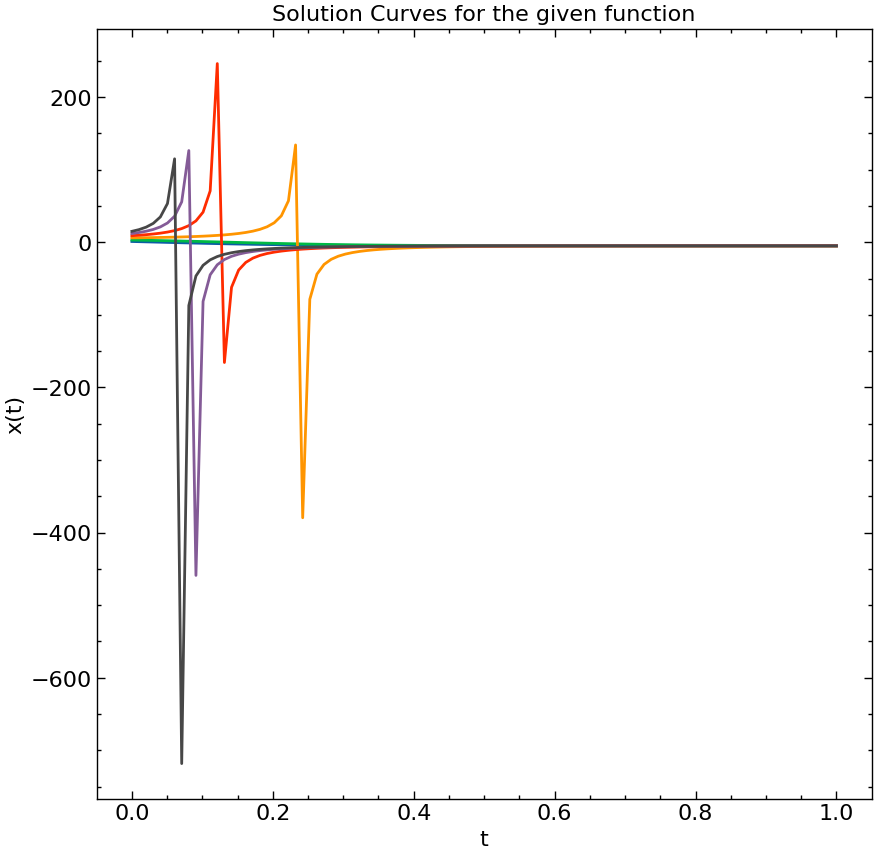

In [46]:
# Define the x(t) solution as a function
def x_t_func(t, x0):
    return 5 * (x0 * np.exp(10 * t) + x0 - 5 * np.exp(10 * t) + 5) / (-x0 * np.exp(10 * t) + x0 + 5 * np.exp(10 * t) + 5)

# Set the time range and initial conditions
t_vals = np.linspace(0, 1, 100)
initial_conditions = [1, 3, 6, 9, 12, 15]

# Plot the solution curves
plt.figure(figsize=(10, 10))
for x0 in initial_conditions:
    x_vals = x_t_func(t_vals, x0)
    plt.plot(t_vals, x_vals, label=f'x(0) = {x0}')

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution Curves for the given function')
plt.grid()
plt.show()


Q4 - 2

Solve the equation f(x) = 0 to find the critical points of the given autonomous diff eq dx/dt = f(x)

Analyze the sign of f(x) to determine whether each critical point is stable or unstable. Construct the corresponding phase diagram for the diff eq.

Solve the diff eq explicitly for x(t) in terms of t. 

dx/dt = x^2 - 81

In [49]:
dx_dt = x**2 - 81

smp.solve(dx_dt)

# -9 is stable because when x < 9, x^2 < 81, so dx/dt < 0. Solution moves towards cp = stable

# 9 is unstable because when x > 9, x^2 > 81, so dx/dt > 0. Solution moves away from cp = unstable

[-9, 9]

In [53]:
x, t, x0, C = smp.symbols('x t x0 C', real=True)
f_x = (x**2 - 81)
dx_dt = f_x

# Separate variables and integrate
dx = 1 / f_x
dt = 1
integral_x = smp.integrate(dx, x)
integral_t = smp.integrate(dt, t)

# Solve for the constant of integration using the initial condition x(0) = x0
general_solution = smp.Eq(integral_x - integral_t, C)
sol_at_t0 = general_solution.subs({t: 0, x: x0})
C_value = smp.solve(sol_at_t0, C)[0]

# Substitute the constant of integration value back into the general solution
x_t = general_solution.subs(C, C_value)

# Solve for x(t)
x_t_solution = smp.solve(x_t, x)[0]
x_t_solution

9*(x0*exp(18*t) + x0 - 9*exp(18*t) + 9)/(-x0*exp(18*t) + x0 + 9*exp(18*t) + 9)

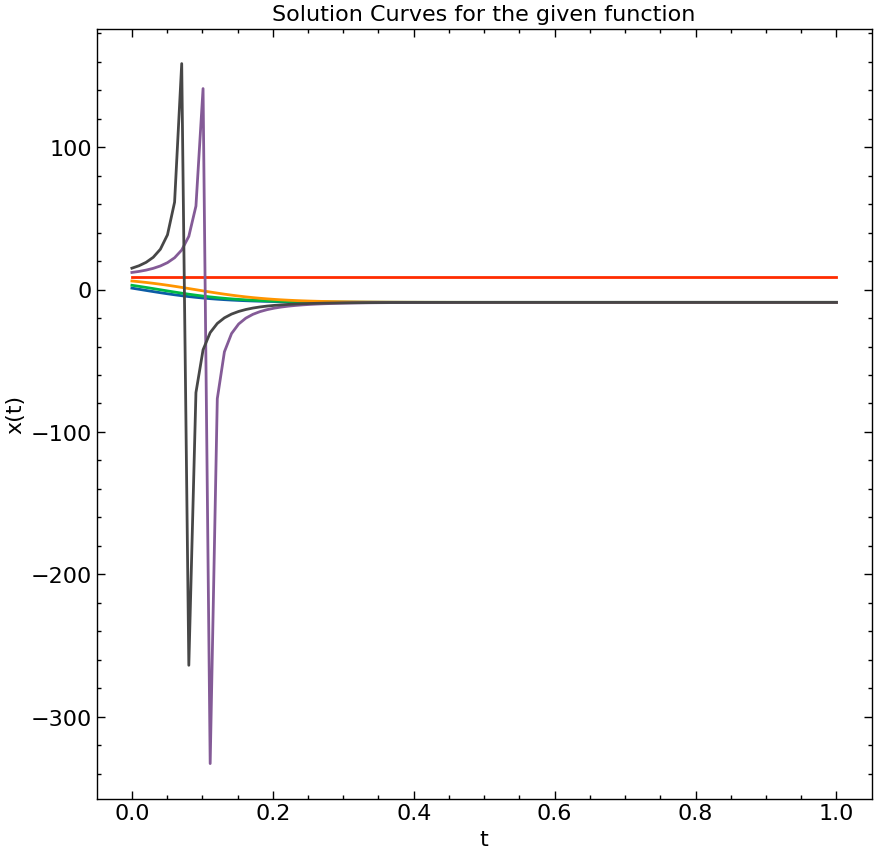

In [52]:
# Define the x(t) solution as a function
def x_t_func(t, x0):
    return 9*(x0*exp(18*t) + x0 - 9*exp(18*t) + 9)/(-x0*exp(18*t) + x0 + 9*exp(18*t) + 9)

# Set the time range and initial conditions
t_vals = np.linspace(0, 1, 100)
initial_conditions = [1, 3, 6, 9, 12, 15]

# Plot the solution curves
plt.figure(figsize=(10, 10))
for x0 in initial_conditions:
    x_vals = x_t_func(t_vals, x0)
    plt.plot(t_vals, x_vals, label=f'x(0) = {x0}')

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution Curves for the given function')
plt.grid()
plt.show()

Q4 - 3

Solve the equation f(x) = 0 to find the critical points of the given autonomous diff eq dx/dt = f(x)

Analyze the sign of f(x) to determine whether each critical point is stable or unstable. Construct the corresponding phase diagram for the diff eq.

Solve the diff eq explicitly for x(t) in terms of t. 

dx/dt = x^2 - 400

In [58]:
dx_dt = x**2 - 400

smp.solve(dx_dt)

# -20 is stable because when x < 20, x^2 < 400, so dx/dt < 0. Solution moves towards cp = stable

# 20 is unstable because when x > 20, x^2 > 400, so dx/dt > 0. Solution moves away from cp = unstable

[-20, 20]

In [63]:
x, t, x0, C = smp.symbols('x t x0 C', real=True)
f_x = (x**2 - 400)
dx_dt = f_x

# Separate variables and integrate
dx = 1 / f_x
dt = 1
integral_x = smp.integrate(dx, x)
integral_t = smp.integrate(dt, t)

# Solve for the constant of integration using the initial condition x(0) = x0
general_solution = smp.Eq(integral_x - integral_t, C)
sol_at_t0 = general_solution.subs({t: 0, x: x0})
C_value = smp.solve(sol_at_t0, C)[0]

# Substitute the constant of integration value back into the general solution
x_t = general_solution.subs(C, C_value)

# Solve for x(t)
x_t_solution = smp.solve(x_t, x)[0]
x_t_solution

20*(x0*exp(40*t) + x0 - 20*exp(40*t) + 20)/(-x0*exp(40*t) + x0 + 20*exp(40*t) + 20)

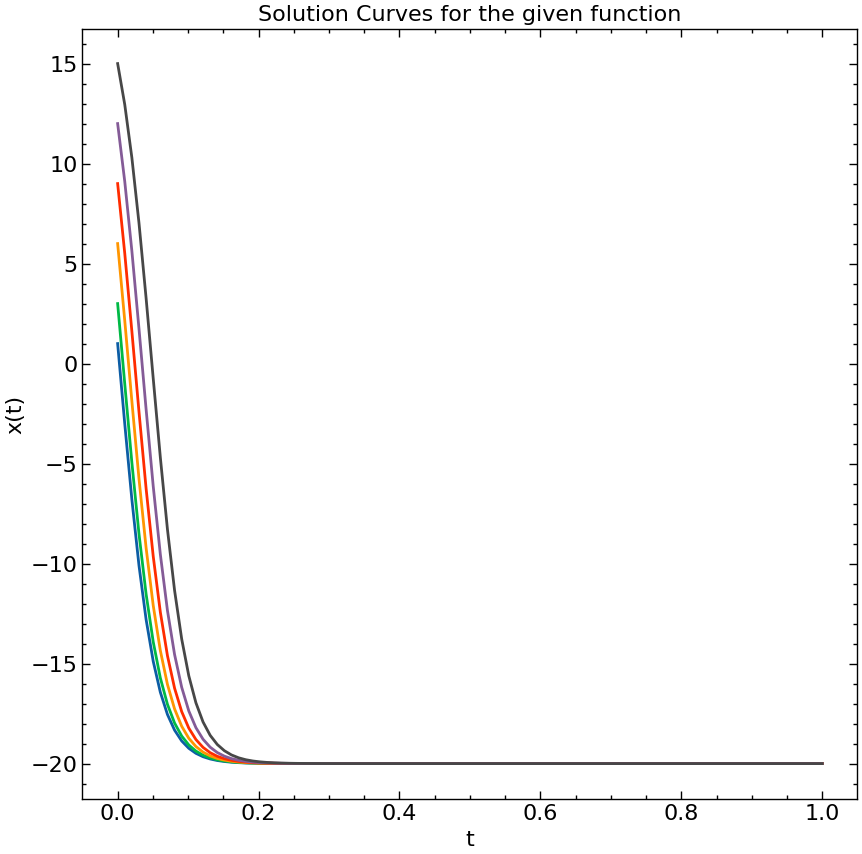

In [68]:
# Define the x(t) solution as a function
def x_t_func(t, x0):
    return (20*(x0*exp(40*t) + x0 - 20*exp(40*t) + 20)) / (-x0*exp(40*t) + x0 + 20*exp(40*t) + 20)

# Set the time range and initial conditions
t_vals = np.linspace(0, 1, 100)
initial_conditions = [1, 3, 6, 9, 12, 15]

# Plot the solution curves
plt.figure(figsize=(10, 10))
for x0 in initial_conditions:
    x_vals = x_t_func(t_vals, x0)
    plt.plot(t_vals, x_vals, label=f'x(0) = {x0}')

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution Curves for the given function')
plt.grid()
plt.show()

Q5

Solve the equation f(x) = 0 to find the critical points of the given autonomous diff eq: 

dx/dt = f(x)

Analyze the sign of f(x) to determine whether each critical point is stable or unstable and construct a phase diagram for the diff eq. 

Solve the diff eq explicitly for x(t) in terms of t. 

dx/dt = (x - 14)^2

***Critical points = values of x where x' = 0***

Types of CPs:

Stable = both sides converge to the point

unstable = both sides diverge from the point

semi-stable = one side converges to the point and one side diverges

In [33]:
dx_dt = (x - 14)**2

smp.solve(smp.diff(dx_dt)) # This would be a semi-stable critical point both pointing to right

[14]

In [34]:
x, t, x0, C = smp.symbols('x t x0 C', real=True)
f_x = (x - 14)**2
dx_dt = f_x

# Separate variables and integrate
dx = 1 / f_x
dt = 1
integral_x = smp.integrate(dx, x)
integral_t = smp.integrate(dt, t)

# Solve for the constant of integration using the initial condition x(0) = x0
general_solution = smp.Eq(integral_x - integral_t, C)
sol_at_t0 = general_solution.subs({t: 0, x: x0})
C_value = smp.solve(sol_at_t0, C)[0]

# Substitute the constant of integration value back into the general solution
x_t = general_solution.subs(C, C_value)

# Solve for x(t)
x_t_solution = smp.solve(x_t, x)[0]
x_t_solution

(-14*t*x0 + 196*t + x0)/(-t*x0 + 14*t + 1)

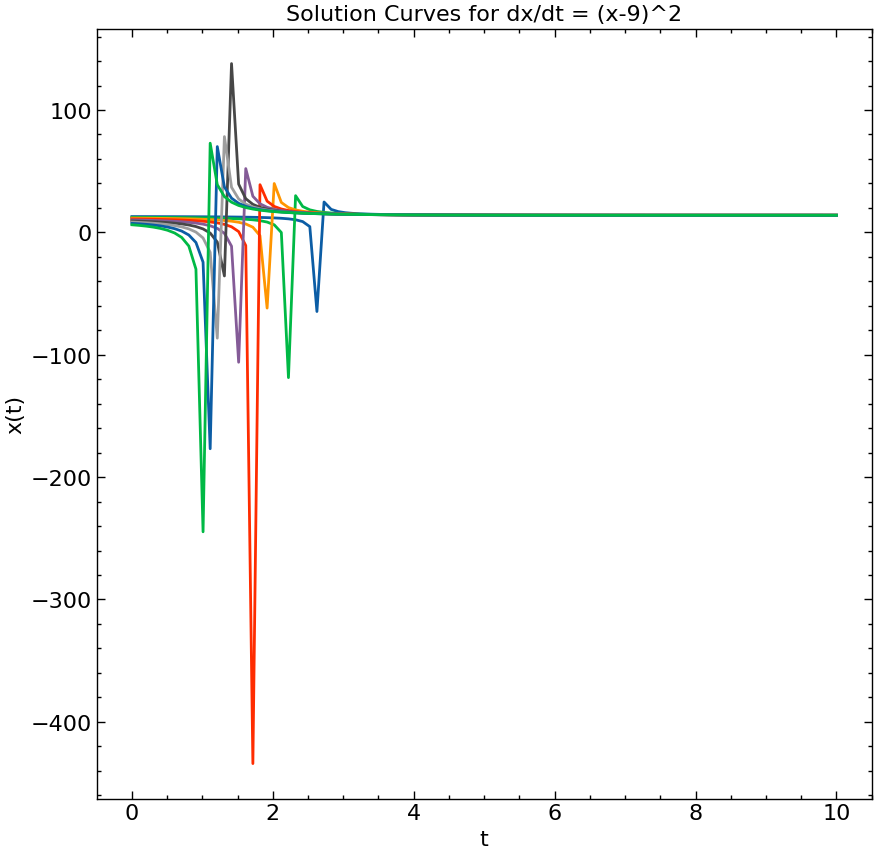

In [35]:
# Define the x(t) solution as a function
def x_t_func(t, x0):
    return (14*x0 + 14*(x0 - 14)*np.exp(-t))/(x0 - 14*np.exp(-t))

# Set the time range and initial conditions
t_vals = np.linspace(0, 10, 100)
initial_conditions = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Plot the solution curves
plt.figure(figsize=(10, 10))
for x0 in initial_conditions:
    x_vals = x_t_func(t_vals, x0)
    plt.plot(t_vals, x_vals, label=f'x(0) = {x0}')

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution Curves for dx/dt = (x-9)^2')
plt.grid()
plt.show()

Q5 - 2

In [11]:
dx_dt = (x - 9)**2

smp.solve(smp.diff(dx_dt)) # Semi-stable critical point both pointing to right

[9]

In [16]:
x, t, x0, C = smp.symbols('x t x0 C', real=True)
f_x = (x - 9)**2
dx_dt = f_x

# Separate variables and integrate
dx = 1 / f_x
dt = 1
integral_x = smp.integrate(dx, x)
integral_t = smp.integrate(dt, t)

# Solve for the constant of integration using the initial condition x(0) = x0
general_solution = smp.Eq(integral_x - integral_t, C)
sol_at_t0 = general_solution.subs({t: 0, x: x0})
C_value = smp.solve(sol_at_t0, C)[0]

# Substitute the constant of integration value back into the general solution
x_t = general_solution.subs(C, C_value)

# Solve for x(t)
x_t_solution = smp.solve(x_t, x)[0]
x_t_solution

(-9*t*x0 + 81*t + x0)/(-t*x0 + 9*t + 1)

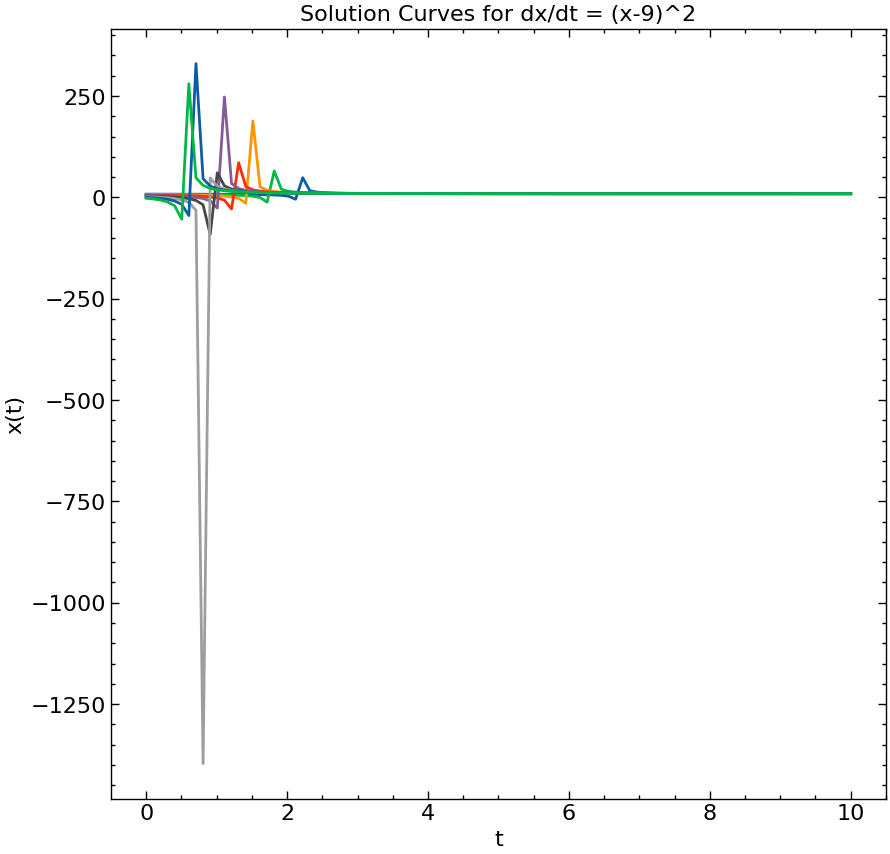

In [29]:
# Define the x(t) solution as a function
def x_t_func(t, x0):
    return (9*x0 + 9*(x0 - 9)*np.exp(-t))/(x0 - 9*np.exp(-t))

# Set the time range and initial conditions
t_vals = np.linspace(0, 10, 100)
initial_conditions = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Plot the solution curves
plt.figure(figsize=(10, 10))
for x0 in initial_conditions:
    x_vals = x_t_func(t_vals, x0)
    plt.plot(t_vals, x_vals, label=f'x(0) = {x0}')

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution Curves for dx/dt = (x-9)^2')
plt.grid()
plt.show()


Example:

Find the critical points of y' = 2y - 1

In [6]:
eq = 2*y - 1

cp = smp.solve(eq)

print(f"y = {cp}")

y = [1/2]


Example: 

Find the critical points of 2y^3 - 5y^2 + 2y

In [7]:
eq = 2*y**3 - 5*y**2 + 2*y

cp = smp.solve(eq)

print(f"y = {cp}")

y = [0, 1/2, 2]


Q7

The acceleration of a car is proportional to difference b/t 250 km/h and the velocity of the car.

If the car can accelerate from rest to 115 km/h in 9s, how long will it take for the car to accelerate from rest to 230 km/h?

Q8

A man bails out of an airplane at altitude 13,000 ft, falls freely for 18 s, then opens his parachute.

How long will it take him to reach the ground?

Assume linear air resistance v ft/s^2, taking (rho) = .16 without the parachute and (rho) = 1.6 with it.

Q9

Apply Euler's Method twice to approximate the solution to the initial value problem on the interval [0, 1/2], first w/ step size

h = 0.25, then w/ step size h = 0.1. 

Compare three-decimal-place values of the two approximations at x = 1/2 w/ value of y(1/2) of the actual solution.

y' = y, y(0) = 4, y(x) = 4e^x

In [57]:
# Function e_meth takes 5 parameters:
# f = derivative
# a and b = interval
# h = step size
# y0 = initial value

def e_meth(f, a, b, h, y0):
    n = int((b - a) / h) # calculates number of steps needed based on step size / interval
    x = np.linspace(a, b, n+1) # Creates an array of n+1 equally spaced points b/t a and b, inclusive
    y = np.zeros(n+1) # Creates an array of n+1 zeros. This stores approximated values of y
    y[0] = y0 # First element of y array to the initial value y0
    
    for i in range(n):
        # Euler Method step: Updates next value of y based on current value and the derivative at the current point
        y[i+1] = y[i] + h * f(x[i], y[i])
        
    return x, y # Returns arrays x and y representing points / approximated values, respectively

# Defines function for the derivative
def f(x, y):
    return y

# Apply Euler's method with step size h = 0.25
x1, y1 = e_meth(f, 0, 0.5, 0.25, 4)

# Apply Euler's method with step size h = 0.1
x2, y2 = e_meth(f, 0, 0.5, 0.1, 4)

# Calculate actual value at x = 0.5
actual_value = 4*np.exp(0.5) # plug in 0.5 for x

# Print approximations and actual value
print(f"Approximation with h = 0.25: {y1[-1]:.3f}")
print(f"Approximation with h = 0.1: {y2[-1]:.3f}")
print(f"Actual value: {actual_value:.3f}")

# The approximation 6.442, using the lesser value of h, is closer to the value of y(1/2) found using the actual solution. 

Approximation with h = 0.25: 6.250
Approximation with h = 0.1: 6.442
Actual value: 6.595


Q10

Apply Euler's Method twice to approximate the solution to the initial value problem on the interval [0, 1/2],

first w/ step size h = 0.25, then w/ step size h = 0.1

Compare the three-decimal-place values of the two approximations at x = (1/2) w/ value of y(1/2) of the actual solution:

y' = (-4(x^3)y), y(0) = 9, y(x) = (9e^(-x^4))

In [58]:
# Function e_meth takes 5 parameters:
# f = derivative
# a and b = interval
# h = step size
# y0 = initial value

def e_meth(f, a, b, h, y0):
    n = int((b - a) / h) # calculates number of steps needed based on step size / interval
    x = np.linspace(a, b, n+1) # Creates an array of n+1 equally spaced points b/t a and b, inclusive
    y = np.zeros(n+1) # Creates an array of n+1 zeros. This stores approximated values of y
    y[0] = y0 # First element of y array to the initial value y0
    
    for i in range(n):
        # Euler Method step: Updates next value of y based on current value and the derivative at the current point
        y[i+1] = y[i] + h * f(x[i], y[i])
        
    return x, y # Returns arrays x and y representing points / approximated values, respectively

# Defines function for the derivative
def f(x, y):
    return -4*(x**3)*y

# Apply Euler's method with step size h = 0.25
x1, y1 = e_meth(f, 0, 0.5, 0.25, 9)

# Apply Euler's method with step size h = 0.1
x2, y2 = e_meth(f, 0, 0.5, 0.1, 9)

# Calculate actual value at x = 0.5
actual_value = 9*np.exp(-0.5**4) # plug in 0.5 for x

# Print approximations and actual value
print(f"Approximation with h = 0.25: {y1[-1]:.3f}")
print(f"Approximation with h = 0.1: {y2[-1]:.3f}")
print(f"Actual value: {actual_value:.3f}")

# The approximation 8.644, using the lesser value of h, is closer to the value of y(1/2) found using the actual solution

Approximation with h = 0.25: 8.859
Approximation with h = 0.1: 8.644
Actual value: 8.455


Q10 - 2

Apply Euler's Method twice to approximate the solution to the initial value problem on the interval [0, 1/2],

first w/ step size h = 0.25, then w/ step size h = 0.1

Compare the three-decimal-place values of the two approximations at x = (1/2) w/ value of y(1/2) of the actual solution:

y' = -4(x^3)y, y(0) = 12, y(x) = 12e^(-x^4)

In [55]:
# Function e_meth takes 5 parameters:
# f = derivative
# a and b = interval
# h = step size
# y0 = initial value

def e_meth(f, a, b, h, y0):
    n = int((b - a) / h) # calculates number of steps needed based on step size / interval
    x = np.linspace(a, b, n+1) # Creates an array of n+1 equally spaced points b/t a and b, inclusive
    y = np.zeros(n+1) # Creates an array of n+1 zeros. This stores approximated values of y
    y[0] = y0 # First element of y array to the initial value y0
    
    for i in range(n):
        # Euler Method step: Updates next value of y based on current value and the derivative at the current point
        y[i+1] = y[i] + h * f(x[i], y[i])
        
    return x, y # Returns arrays x and y representing points / approximated values, respectively

# Defines function for the derivative
def f(x, y):
    return -4*(x**3)*y

# Apply Euler's method with step size h = 0.25
x1, y1 = e_meth(f, 0, 0.5, 0.25, 12)

# Apply Euler's method with step size h = 0.1
x2, y2 = e_meth(f, 0, 0.5, 0.1, 12)

# Calculate actual value at x = 0.5
actual_value = 12*np.exp(-0.5**4)

# Print approximations and actual value
print(f"Approximation with h = 0.25: {y1[-1]:.3f}")
print(f"Approximation with h = 0.1: {y2[-1]:.3f}")
print(f"Actual value: {actual_value:.3f}")

# The approximation of 11.525, using the lesser value of h, is closer to the value of y(1/2) found using the actual solution. 

Approximation with h = 0.25: 11.812
Approximation with h = 0.1: 11.525
Actual value: 11.273


Week One Plots

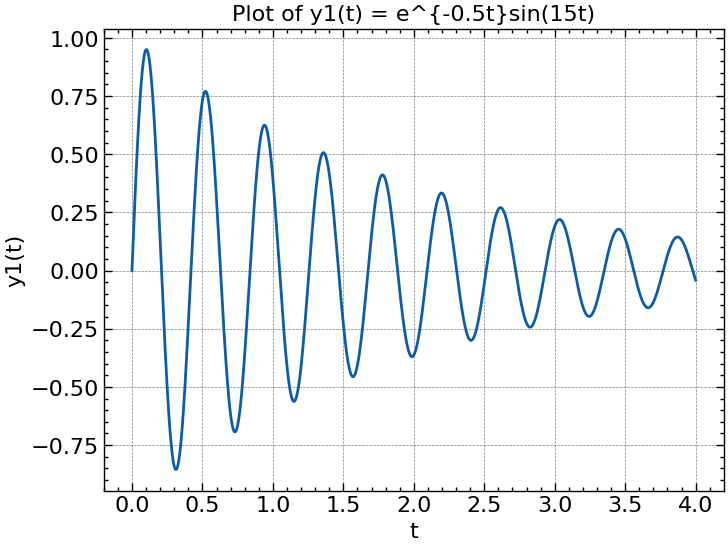

In [2]:
# Define the range of t
t = np.linspace(0, 4, 1000)

# Define function y1
y1 = np.exp(-0.5*t)*np.sin(15*t)

# Create plot
plt.plot(t, y1, linewidth=2)

# Turn on grid
plt.grid(True)

# Labels/title
plt.xlabel('t')
plt.ylabel('y1(t)')
plt.title('Plot of y1(t) = e^{-0.5t}sin(15t)')

# Show the plot
plt.show()

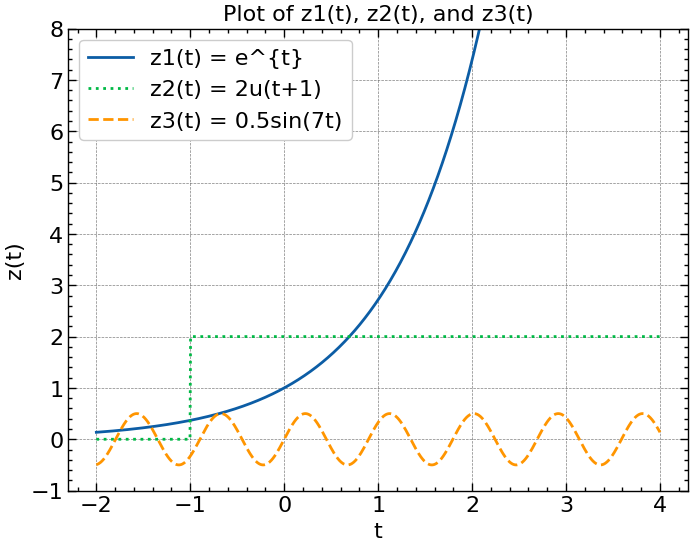

In [3]:
# Define the range of t
t = np.linspace(-2, 4, 1000)

# Define functions z1, z2, z3
z1 = np.exp(t)
z2 = 2*(t+1 >= 0)  # Where u(t+1) is a unit step function
z3 = 0.5*np.sin(7*t)

# Create plot for z1, z2, z3
plt.plot(t, z1, linewidth=2)
plt.plot(t, z2, ':', linewidth=2) 
plt.plot(t, z3, '--', linewidth=2)

plt.grid(True)

# Add labels/titles/legend
plt.xlabel('t')
plt.ylabel('z(t)')
plt.title('Plot of z1(t), z2(t), and z3(t)')
plt.legend(['z1(t) = e^{t}', 'z2(t) = 2u(t+1)', 'z3(t) = 0.5sin(7t)'], loc='best')

# y-axis limits
plt.ylim([-1, 8])

plt.show()

Week 2 Graphs

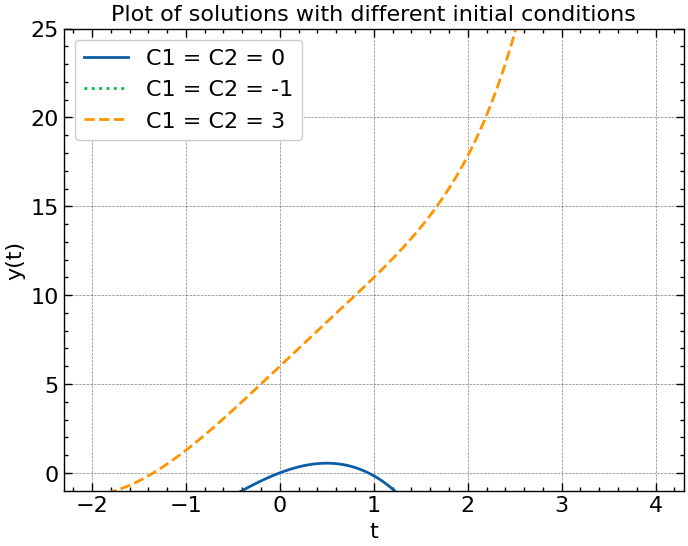

In [4]:
# Define variables
t, C1, C2 = smp.symbols('t C1 C2')

# Define y as function of t, C1 and C2
y = smp.Function('y')(t)

# Define differential equation
eqn = smp.diff(y, t, t) - smp.diff(y, t) - 2*t**2 + t + 5

# Solve differential equation
sol = smp.dsolve(eqn)

# Convert sol to a function for plot
y_sol = smp.lambdify((t, C1, C2), sol.rhs, 'numpy')

# Define range of t
t_vals = np.linspace(-2, 4, 1000)

# Plot solutions with different initial conditions
plt.plot(t_vals, y_sol(t_vals, 0, 0), linewidth=2)
plt.plot(t_vals, y_sol(t_vals, -1, -1), ':', linewidth=2)
plt.plot(t_vals, y_sol(t_vals, 3, 3), '--', linewidth=2)

plt.grid(True)

# Labels/title/legend
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Plot of solutions with different initial conditions')
plt.legend(['C1 = C2 = 0', 'C1 = C2 = -1', 'C1 = C2 = 3'], loc='best')

plt.ylim([-1, 25])

plt.show()

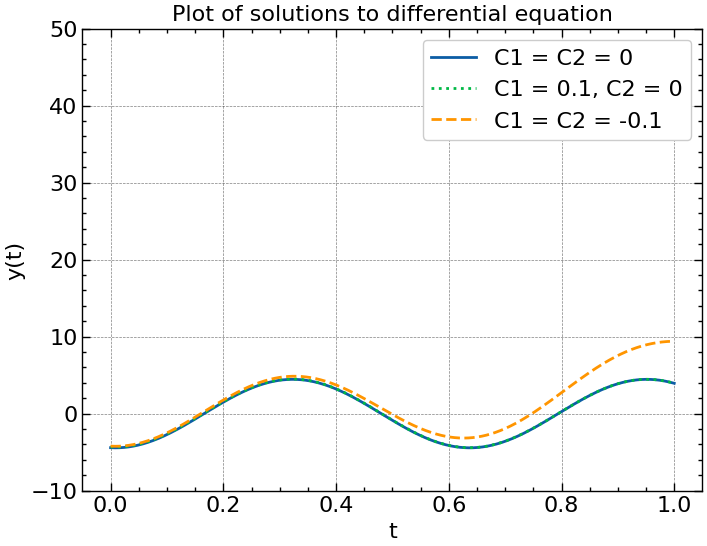

In [7]:
# Define variables
t, C1, C2 = smp.symbols('t C1 C2')

# Define y as a function of t
y = smp.Function('y')(t)

# Define the differential equation
eqn = smp.diff(y, t, t) - smp.diff(y, t) - 12*y - 500*smp.cos(10*t)

# Solve the differential equation
sol = smp.dsolve(eqn)

# Convert sol to a function for plotting
y_sol = smp.lambdify((t, C1, C2), sol.rhs, 'numpy')

# Define range of t
t_vals = np.linspace(0, 1, 1000)

# Plot solutions with different initial conditions
plt.plot(t_vals, y_sol(t_vals, 0, 0), linewidth=2)
plt.plot(t_vals, y_sol(t_vals, 0.1, 0), ':', linewidth=2)
plt.plot(t_vals, y_sol(t_vals, 0.1, 0.1), '--', linewidth=2)

plt.grid(True)

# Add labels/title/legend
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Plot of solutions to differential equation')
plt.legend(['C1 = C2 = 0', 'C1 = 0.1, C2 = 0', 'C1 = C2 = -0.1'], loc='best')

plt.ylim([-10, 50])

plt.show()